<a href="https://colab.research.google.com/github/Chaitanya-Atluri/Todo-list/blob/master/cn_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
################################################################################
#
# LOGISTICS
#
#    Venkata sai krishna chaitanya Atluri
#    VXA190013
#

# DESCRIPTION
#
#    MNIST image classification with an xNN written and trained in Python
#
# INSTRUCTIONS
#
#    1. Go to Google Colaboratory: https://colab.research.google.com/notebooks/welcome.ipynb
#    2. File - New Python 3 notebook
#    3. Cut and paste this file into the cell (feel free to divide into multiple cells)
#    4. Runtime - Run all
#
# NOTES
#
#    1. This does not use PyTorch, TensorFlow or any other xNN library
#
#    2. Include a short summary here in nn.py of what you did for the neural
#       network portion of code
#
#     The given neural net meets all the requirments as stated and in addition to it it also contains the following

#     ->A graph with test and train accuracy against epoch
#     

#     ->A graph of time taken for each epoch
#
#     ->A display of one of the wrongly classified label along with its original label
#
#     ->List of all wrongly predicted labels
#
#     ->predicting accuracy for all individual classes i.e accuracy for each of the digit from 0 to 9 in training data
#
#     ->
#
#
#
#
#
#
#
#
#    3. Include a short summary here in cnn.py of what you did for the
#       convolutional neural network portion of code
#
#    4. Include a short summary here in extra.py of what you did for the extra
#       portion of code
#
################################################################################

################################################################################
#
# IMPORT
#
################################################################################

#
# you should not need any import beyond the below
# PyTorch, TensorFlow, ... is not allowed
#

import os.path
import urllib.request
import gzip
import math
import numpy             as np
import matplotlib.pyplot as plt
import time



In [133]:

################################################################################
#
# PARAMETERS
#
################################################################################

#
# add other hyper parameters here with some logical organization
#

# data
DATA_NUM_TRAIN         = 60000
DATA_NUM_TEST          = 10000
DATA_CHANNELS          = 1
DATA_ROWS              = 28
DATA_COLS              = 28
DATA_CLASSES           = 10
DATA_URL_TRAIN_DATA    = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
DATA_URL_TRAIN_LABELS  = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
DATA_URL_TEST_DATA     = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
DATA_URL_TEST_LABELS   = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
DATA_FILE_TRAIN_DATA   = 'train_data.gz'
DATA_FILE_TRAIN_LABELS = 'train_labels.gz'
DATA_FILE_TEST_DATA    = 'test_data.gz'
DATA_FILE_TEST_LABELS  = 'test_labels.gz'
EPOCHS                 = 5

# display
DISPLAY_ROWS   = 8
DISPLAY_COLS   = 4
DISPLAY_COL_IN = 10
DISPLAY_ROW_IN = 25
DISPLAY_NUM    = DISPLAY_ROWS*DISPLAY_COLS




In [134]:
################################################################################
#
# DATA
#
################################################################################

# download
if (os.path.exists(DATA_FILE_TRAIN_DATA)   == False):
    urllib.request.urlretrieve(DATA_URL_TRAIN_DATA,   DATA_FILE_TRAIN_DATA)
if (os.path.exists(DATA_FILE_TRAIN_LABELS) == False):
    urllib.request.urlretrieve(DATA_URL_TRAIN_LABELS, DATA_FILE_TRAIN_LABELS)
if (os.path.exists(DATA_FILE_TEST_DATA)    == False):
    urllib.request.urlretrieve(DATA_URL_TEST_DATA,    DATA_FILE_TEST_DATA)
if (os.path.exists(DATA_FILE_TEST_LABELS)  == False):
    urllib.request.urlretrieve(DATA_URL_TEST_LABELS,  DATA_FILE_TEST_LABELS)

# training data
# unzip the file, skip the header, read the rest into a buffer and format to NCHW
file_train_data   = gzip.open(DATA_FILE_TRAIN_DATA, 'r')
file_train_data.read(16)
buffer_train_data = file_train_data.read(DATA_NUM_TRAIN*DATA_ROWS*DATA_COLS)
train_data        = np.frombuffer(buffer_train_data, dtype=np.uint8).astype(np.float64)
train_data        = train_data.reshape(DATA_NUM_TRAIN, 1, DATA_ROWS, DATA_COLS)
# training labels
# unzip the file, skip the header, read the rest into a buffer and format to a vector
file_train_labels   = gzip.open(DATA_FILE_TRAIN_LABELS, 'r')
file_train_labels.read(8)
buffer_train_labels = file_train_labels.read(DATA_NUM_TRAIN)
train_labels        = np.frombuffer(buffer_train_labels, dtype=np.uint8).astype(np.int64)

# testing data
# unzip the file, skip the header, read the rest into a buffer and format to NCHW
file_test_data   = gzip.open(DATA_FILE_TEST_DATA, 'r')
file_test_data.read(16)
buffer_test_data = file_test_data.read(DATA_NUM_TEST*DATA_ROWS*DATA_COLS)
test_data        = np.frombuffer(buffer_test_data, dtype=np.uint8).astype(np.float64)
test_data        = test_data.reshape(DATA_NUM_TEST, 1, DATA_ROWS, DATA_COLS)
testing_data = test_data
# testing labels
# unzip the file, skip the header, read the rest into a buffer and format to a vector
file_test_labels   = gzip.open(DATA_FILE_TEST_LABELS, 'r')
file_test_labels.read(8)
buffer_test_labels = file_test_labels.read(DATA_NUM_TEST)
test_labels        = np.frombuffer(buffer_test_labels, dtype=np.uint8).astype(np.int64)

np.random.seed(1)

print(train_data[1])

# debug
# print(train_data.shape)   # (60000, 1, 28, 28)
# print(train_labels.shape) # (60000,)
# print(test_data.shape)    # (10000, 1, 28, 28)
# print(test_labels.shape)  # (10000,)


[[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
   227. 253. 252. 239. 233. 252.  57.   6.   

In [135]:
################################################################################
#
# YOUR CODE GOES HERE
#
################################################################################

#
# feel free to split this into some number of classes, functions, ... if it
# helps with code organization; for example, you may want to create a class for
# each of your layers that store parameters, performs initialization and
# includes forward and backward functions
#
# x = np.random.random((2,2,3))
# print(x)
#learning rate
lr= 0.001


# random.seed(1)
#one hot vector for labels
one_hot_labels = np.zeros((train_labels.shape[0], 10))

for i in range(train_labels.shape[0]):
    one_hot_labels[i, train_labels[i]] = 1
one_hot_labels = np.array(one_hot_labels, dtype='float32')

# Relu activation function
def relu(a, derivative=False):
  if derivative:
    return np.greater(a,0).astype(int)
  else:
    return np.maximum(0,a)

def softmax(X):
  """ applies softmax to an input x"""
  exps = np.exp(X - np.max(X))
  return exps / np.sum(exps)


def cross_entropy(X,y):
    """
    X is the output from fully connected layer (num_examples x num_classes)
    y is labels (num_examples x 1)
    	Note that y is not one-hot encoded vector. 
    	It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
    """
    m = y.shape[0]
    p = softmax(X)
    # We use multidimensional array indexing to extract 
    # softmax probability of the correct label for each sample.
    # Refer to https://docs.scipy.org/doc/numpy/user/basics.indexing.html#indexing-multi-dimensional-arrays for understanding multidimensional array indexing.
    log_likelihood = -np.log(p[range(m),y])
    loss = np.sum(log_likelihood) / m
    return loss
  

def delta_cross_entropy(X,y):
    """
    X is the output from fully connected layer (num_examples x num_classes)
    y is labels (num_examples x 1)
    	Note that y is not one-hot encoded vector. 
    	It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
    """
    m = y.shape[0]
    grad = softmax(X)
    grad[range(m),y] -= 1
    grad = grad/m
    return grad


# normalize
train_data = (train_data/255).astype('float32')
test_data = (test_data/255).astype('float32')


print(train_data[2])


# vectorize input array
train_data = train_data.reshape(train_data.shape[0],1,28*28)
test_data = test_data.reshape(test_data.shape[0],1,28*28)


# Hidden weight layer for input 
w1 = np.random.randn(train_data.shape[2], 1000)*np.sqrt(1./train_data.shape[2])
b1 = np.random.randn(1000)
 
# 2nd hidden layer
w2 = np.random.randn(w1.shape[1], 100)*np.sqrt(1./w1.shape[1])
b2 = np.random.randn(100)

# 3rd hidden layer
w3 = np.random.randn(w2.shape[1], 10)*np.sqrt(1./w2.shape[1])
b3 = np.random.randn(10)



[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

In [155]:
num_epochs = 10
train_acc = [0] * num_epochs
times= [0] * num_epochs
# Feed forward network
training_accuracy=[]
testing_accuracy=[]
for epoch in range(num_epochs):
  start = time.time()
  loss=0
  train_count=0
  for i,val in enumerate(train_data):
    temp_input = np.copy(val)

    # print(temp_input)
    #First layer
    x1 = np.dot(temp_input, w1)
    z1 = np.add(x1,b1)
    # print(z1)
    a1 = relu(z1)
    # print(a1)
    #Second Layer
    x2 = np.dot(a1, w2)
    z2 = np.add(x2,b2)
    a2 = relu(z2)

    #Third layer
    x3 = np.dot(a2, w3)
    z3 = np.add(x3,b3)
    output = softmax(z3)
    if(np.argmax(output) == train_labels[i]):
      train_count+=1

    #backprop and derivatives
    #Final output layer dealing with softmax function
    dcost_dz3 = output - one_hot_labels[i]
    dz3_dw3 = a2
    dcost_w3 = np.dot(dz3_dw3.T, dcost_dz3)
    dcost_b3 = dcost_dz3
    # print(dcost_w3.shape)
    # print(dcost_b3.shape)

    # Second layer derivatives
    dz3_da2 = w3
    dcost_da2 = np.dot(dcost_dz3 , dz3_da2.T)
    da2_dz2 = relu(z2, derivative=True)
    dz2_dw2 = a1
    dcost_w2 = np.dot(dz2_dw2.T, da2_dz2 * dcost_da2)
    dcost_b2 = dcost_da2 * da2_dz2
    # print(dcost_w2.shape)
    # print(dcost_b2.shape)


     # First layer derivatives
    dcost_dz2 = dcost_da2*da2_dz2
    dz2_da1 = w2
    dcost_da1 = np.dot(dcost_dz2 , dz2_da1.T)
    da1_dz1 = relu(z1, derivative=True)
    dz1_dw1 = temp_input
    # print(dz3_dw3.shape)
    dcost_w1 = np.dot(dz1_dw1.T, da1_dz1 * dcost_da1)   
    dcost_b1 = dcost_da1 * da1_dz1
 

    # Update weights
    # print(b3.shape, dcost_b3.shape)
    w1 -= lr * dcost_w1
    b1 -= lr * dcost_b1.sum(axis=0)
    w2 -= lr * dcost_w2
    b2 -= lr * dcost_b2.sum(axis=0)
    w3 -= lr * dcost_w3
    b3 -= lr * dcost_b3.sum(axis=0)
    loss = np.sum(-one_hot_labels[i] * np.log(output))
    # if(i%200 == 0):
    #   print(output)
    #   print("Cost is:", loss)
  end = time.time()


  #testing the data with current weights
  coun=0
  for i, val in enumerate(test_data):
    xt1 = np.dot(val, w1)
    zt1 = np.add(xt1,b1)
    at1 = relu(zt1)
    # print(a1)

    #Second Layer
    xt2 = np.dot(at1, w2)
    zt2 = np.add(xt2,b2)
    at2 = relu(zt2)
    # print(a2)
    #Third layer
    xt3 = np.dot(at2, w3)
    zt3 = np.add(xt3,b3)
    # print(z3)
    output_T = softmax(zt3)
    # print(output, test_labels[i])
    if(np.argmax(output_T) == test_labels[i]):
      coun+=1
  ac=coun*100/10000
  train_ac=train_count*100/60000
  training_accuracy.append(train_ac)
  testing_accuracy.append(ac)
  print('Epoch: {} Loss: {:.6f} Time: {:.2f} secs TestAccuracy {:.2f} TrainAccuracy {:.2f}' .format(epoch, loss, end-start,ac,train_ac))
  #storing times for each epoch
  times[epoch]=end-start
  







# error_cost.append(loss)





# output.shape
# print(w1)
# print(b1)

  # error_out = cross_entropy(output,train_labels[i])
    # print(error_out)
# temp_input

# cycle through the epochs

    # set the learning rate

    # cycle through the training data
        # forward pass
        # loss
        # back prop
        # weight update

    # cycle through the testing data
        # forward pass
        # accuracy
    # per epoch display (epoch, time, training loss, testing accuracy, ...)



Epoch: 0 Loss: 0.000088 Time: 299.63 secs TestAccuracy 97.56 TrainAccuracy 99.37
Epoch: 1 Loss: 0.000084 Time: 308.74 secs TestAccuracy 97.60 TrainAccuracy 99.47
Epoch: 2 Loss: 0.000065 Time: 308.01 secs TestAccuracy 97.67 TrainAccuracy 99.58
Epoch: 3 Loss: 0.000064 Time: 295.57 secs TestAccuracy 97.68 TrainAccuracy 99.68
Epoch: 4 Loss: 0.000052 Time: 301.55 secs TestAccuracy 97.71 TrainAccuracy 99.76
Epoch: 5 Loss: 0.000040 Time: 292.06 secs TestAccuracy 97.72 TrainAccuracy 99.83
Epoch: 6 Loss: 0.000034 Time: 298.75 secs TestAccuracy 97.69 TrainAccuracy 99.86
Epoch: 7 Loss: 0.000026 Time: 296.74 secs TestAccuracy 97.74 TrainAccuracy 99.89
Epoch: 8 Loss: 0.000020 Time: 300.60 secs TestAccuracy 97.70 TrainAccuracy 99.92
Epoch: 9 Loss: 0.000016 Time: 297.28 secs TestAccuracy 97.69 TrainAccuracy 99.93


In [156]:

import pickle
output = open('w1.pkl', 'wb')
pickle.dump(w1,output)
output = open('w2.pkl', 'wb')
pickle.dump(w2,output)
output = open('w3.pkl', 'wb')
pickle.dump(w3,output)
output = open('b1.pkl', 'wb')
pickle.dump(b1,output)
output = open('b2.pkl', 'wb')
pickle.dump(b2,output)
output = open('b3.pkl', 'wb')
pickle.dump(b3,output)
output = open('acc.pkl', 'wb')
pickle.dump(train_acc,output)

In [138]:
from google.colab import files
files.download('w2.pkl')
files.download('w3.pkl')
files.download('b1.pkl')
files.download('b2.pkl')
files.download('b3.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [139]:
fw1=open("w1.pkl",'rb')
w1=pickle.load(fw1)
fw2=open("w2.pkl",'rb')
w2=pickle.load(fw2)
fw3=open("w3.pkl",'rb')
w3=pickle.load(fw3)
fb1=open("b1.pkl",'rb')
b1=pickle.load(fb1)
fb2=open("b2.pkl",'rb')
b2=pickle.load(fb2)
fb3=open("b3.pkl",'rb')
b3=pickle.load(fb3)


In [186]:
################################################################################
#
# DISPLAY
#
################################################################################

#
# more code for you to write
#
#Testing
pred_labels=[]
wrong_index=[]
test_label=[0] * 10
test_count=[0] * 10
for i, val in enumerate(test_data):
  label=test_labels[i]
  test_label[label] +=1
  x1 = np.dot(val, w1)
  z1 = np.add(x1,b1)
  a1 = relu(z1)
  # print(a1)

  #Second Layer
  x2 = np.dot(a1, w2)
  z2 = np.add(x2,b2)
  a2 = relu(z2)
  # print(a2)
  #Third layer
  x3 = np.dot(a2, w3)
  z3 = np.add(x3,b3)
  # print(z3)
  output = softmax(z3)
  pred_labels.append(np.argmax(output))
  # print(output, test_labels[i])
  if(np.argmax(output) == test_labels[i]):
    k=test_labels[i]
    test_count[k] +=1
  else:
    wrong_index.append(i)
#correctly classified instances for each label
#sum is used to caluclate total correctly classified instances
sum=0
#sum2 is used to caluclate total instances
sum2=0
al=[]
for i in range(0,10):
  sum=sum+test_count[i]
  sum2=sum2+test_label[i]
  accuracy=test_count[i]*100/test_label[i]
  al.append(accuracy)
  print("Accuracy for identification of the digit {0} is {1} %".format(i,round(accuracy,2)))
acc=sum*100/sum2
print(sum)
print(sum2)
print("Total accuracy is {0} %".format(round(acc,2)))



Accuracy for identification of the digit 0 is 99.18 %
Accuracy for identification of the digit 1 is 99.21 %
Accuracy for identification of the digit 2 is 98.16 %
Accuracy for identification of the digit 3 is 98.22 %
Accuracy for identification of the digit 4 is 98.78 %
Accuracy for identification of the digit 5 is 97.31 %
Accuracy for identification of the digit 6 is 97.49 %
Accuracy for identification of the digit 7 is 94.65 %
Accuracy for identification of the digit 8 is 97.23 %
Accuracy for identification of the digit 9 is 96.53 %
9769
10000
Total accuracy is 97.69 %


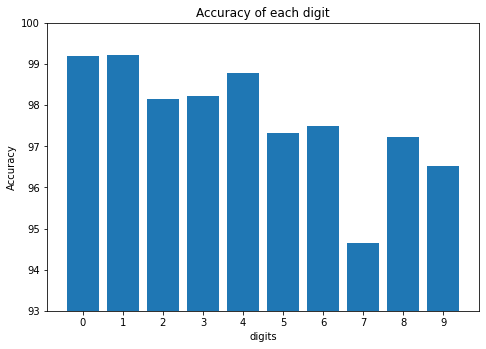

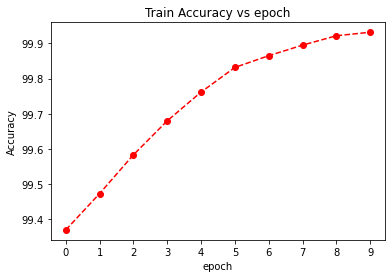

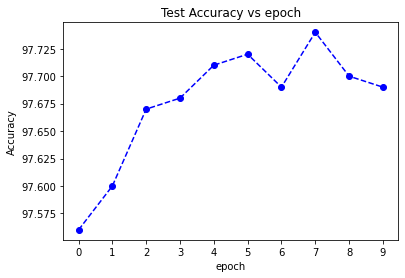

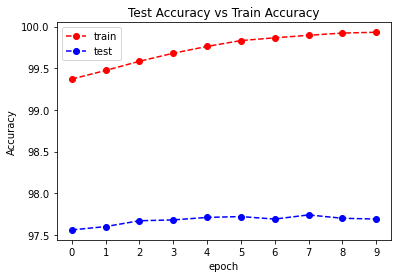

The total time taken for 10 epochs is 2998.94 


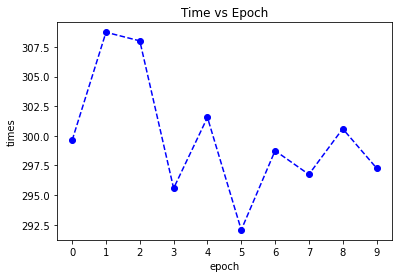

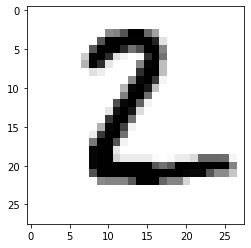

The original label is 2
The predicted label is 4


In [191]:
# accuracy display
# final value
#percentage of digits correctly classified
epoc = [0,1,2,3,4,5,6,7,8,9]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(epoc,al)
plt.ylim(93,100)
plt.xticks(epoci, epoc)
plt.xlabel('digits')
plt.ylabel('Accuracy')
plt.title("Accuracy of each digit")
plt.show()

# plot of train accuracy vs epoch
epoci = list(range(len(epoc)))
l1=plt.plot(epoci, training_accuracy, marker='o', linestyle='--', color='r' ) 
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("Train Accuracy vs epoch")
plt.xticks(xi, x)
plt.show()
# plot of test accuracy vs epoch
epoc = [0,1,2,3,4,5,6,7,8,9]
epoci = list(range(len(epoc)))
l2=plt.plot(epoci, testing_accuracy, marker='o', linestyle='--', color='b' ) 
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("Test Accuracy vs epoch")
plt.xticks(xi, x)
plt.show()
# plot of train accuracy vs test accuracy
epoc = [0,1,2,3,4,5,6,7,8,9]
epoci = list(range(len(epoc)))
l1=plt.plot(epoci, training_accuracy, marker='o', linestyle='--', color='r' ) 
l2=plt.plot(epoci, testing_accuracy, marker='o', linestyle='--', color='b' ) 
plt.legend(['train','test'],loc=0)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("Test Accuracy vs Train Accuracy")
plt.xticks(xi, x)
plt.show()


# performance display

#times=[323.32,314.40,294.89,282.06,279.35,280.07,283.75,286.16,285.13,288.38]
# total time
total_time=0
for i in (times):
  total_time+=i
print("The total time taken for {} epochs is {:.2f} ".format(num_epochs,total_time))
# plot of time vs epoch
epoc = [0,1,2,3,4,5,6,7,8,9]
epoci = list(range(len(epoc)))
plt.plot(epoci, times, marker='o', linestyle='--', color='b') 
plt.xlabel('epoch')
plt.ylabel('times')
plt.title("Time vs Epoch")
plt.xticks(epoci, epoc)
plt.show()


# per layer info (type, input size, output size, parameter size, MACs, ...)

# example display

#wrong classified example
i=wrong_index[1]
image = testing_data[1][0]
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print("The original label is {0}".format(test_labels[i]))
print("The predicted label is {0}".format(pred_labels[i]))




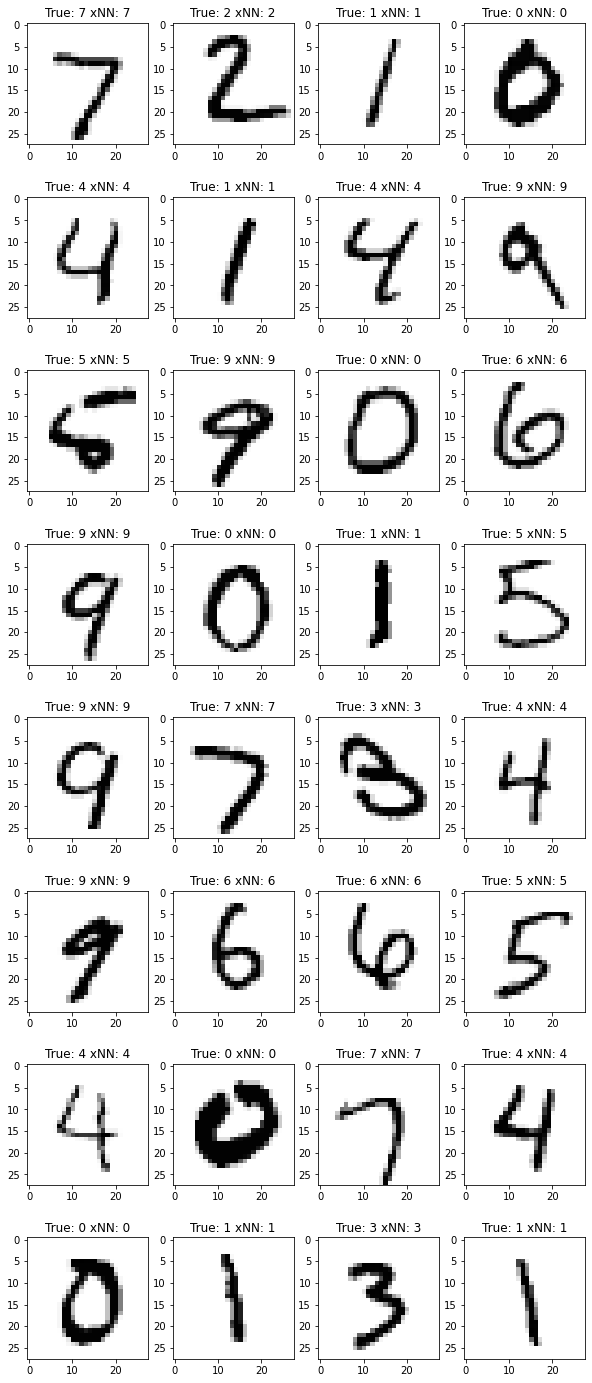

In [189]:
# replace the xNN predicted label with the label predicted by the network
fig = plt.figure(figsize=(DISPLAY_COL_IN, DISPLAY_ROW_IN))
ax  = []
test_data = test_data.reshape(test_data.shape[0],1,28,28)
for i in range(DISPLAY_NUM):
    img = test_data[i, :, :, :].reshape((DATA_ROWS, DATA_COLS))
    ax.append(fig.add_subplot(DISPLAY_ROWS, DISPLAY_COLS, i + 1))
    ax[-1].set_title('True: ' + str(test_labels[i]) + ' xNN: ' + str(pred_labels[i]))
    plt.imshow(img, cmap='Greys')
plt.show()
